In [1]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import pickle
import string
import re

%matplotlib inline


In [4]:
pkl_filename_master = "df_games.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_games = pickle.load(picklefile)
    
df_games.head(2)

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,..."
1,822,Carcassonne,2000,7.335,7.44,67439,//cf.geekdo-images.com/images/pic2337577_mt.jpg,https://boardgamegeek.com/boardgame/822/carcas...,1,2,5,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]"


In [5]:
df_games.columns

Index([u'id', u'name', u'year_released', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category', u'attributes'],
      dtype='object')

Look at data types and what should be changed to ints, floats, etc.

In [6]:
df_games.dtypes

id                object
name              object
year_released     object
geek_rating       object
average_rating    object
nrate             object
pic_url           object
url               object
index1             int64
min_players       object
max_players       object
description       object
category          object
attributes        object
dtype: object

In [11]:
# simple function to change data types

def change_dtype(df, columns, as_type):
    for column in columns:
        df[column] = df[column].astype(as_type)
    return df

In [12]:
floats = ['geek_rating','average_rating']
ints = ['year_released', 'nrate','min_players','max_players']
df_games = change_dtype(df_games, floats, float)
df_games = change_dtype(df_games, ints, int)

In [13]:
df_games.dtypes

id                 object
name               object
year_released       int64
geek_rating       float64
average_rating    float64
nrate               int64
pic_url            object
url                object
index1              int64
min_players         int64
max_players         int64
description        object
category           object
attributes         object
dtype: object

I'm going to look at the number of games released each year to see if there is a year I should cut the data off at. 

In [34]:
#print(df_games['year_released'][df_games['year_released']<1980].groupby(df_games['year_released']).count())
print "Total games from before 1980:", df_games['year_released'][df_games['year_released']<1980].groupby(df_games['year_released']).count().sum()

Total games from before 1980: 86


In [35]:
df_games['name'][df_games['year_released']<1980]

34                                              Risk
44                                             Chess
49                                          Monopoly
52                                          Scrabble
85                                           Acquire
107                                              UNO
114                                             Clue
139                                               Go
172                                         Stratego
180                                        Diplomacy
192                                      Liar's Dice
203                                       Backgammon
227                                          Yahtzee
232                                         Rummikub
243                                        Crokinole
260                                 The Game of Life
272                                            Poker
304                                              Pit
318                                         Cr

In [37]:
#print(df_games['year_released'][df_games['year_released']>1979].groupby(df_games['year_released']).count())
print "Total games from 1980 and after:", df_games['year_released'][df_games['year_released']>1979].groupby(df_games['year_released']).count().sum()

Total games from 1980 and after: 1514


A lot of these games are actually pretty relevant even today, so I'll keep them all in the dataset. 
But, since the rate of game development was so low prior to 1980 (86/1600 games), I'm going to excluse games prior to 1980 from most of my plots. 

In [38]:
 df_games_year = df_games[df_games['year_released'] > 1980]

In [39]:
 df_games_year = df_games_year.groupby(['year_released'])

In [40]:
df_games_year['name'].count()

year_released
1981      8
1982      7
1983     10
1984      4
1985      6
1986     11
1987      4
1988      6
1989      7
1990      6
1991     10
1992      5
1993      9
1994     14
1995     20
1996     12
1997     20
1998     19
1999     30
2000     29
2001     30
2002     44
2003     46
2004     66
2005     77
2006     61
2007     77
2008     83
2009     92
2010     97
2011    118
2012    109
2013    103
2014    109
2015    104
2016     56
2017      2
Name: name, dtype: int64

In [43]:
category_list = df_games['category'].tolist()
flattened_category_list = [val for sublist in category_list for val in sublist]
category_set = set(flattened_category_list)
print(len(category_set), category_set)

(81, set(['World War I', 'City Building', 'Ancient', 'Humor', 'Science Fiction', 'Mature / Adult', 'Vietnam War', 'Abstract Strategy', 'Travel', 'Action / Dexterity', 'Political', 'Educational', 'Sports', 'Civilization', 'Music', 'Bluffing', 'American West', 'Memory', 'Party Game', "Children's Game", 'Farming', 'Racing', 'Math', 'Dice', 'American Civil War', 'Trivia', 'Transportation', 'Medieval', 'Renaissance', 'Space Exploration', 'Horror', 'Comic Book / Strip', 'Wargame', 'Card Game', 'Movies / TV / Radio theme', 'Miniatures', 'Adventure', 'Real-time', 'Expansion for Base-game', 'Collectible Components', 'Aviation / Flight', 'Novel-based', 'Territory Building', 'Book', 'Prehistoric', 'Animals', 'Modern Warfare', 'Print & Play', 'Napoleonic', 'Murder/Mystery', 'Medical', 'Fighting', 'Industry / Manufacturing', 'Deduction', 'Game System', 'American Revolutionary War', 'Exploration', 'Zombies', 'Trains', 'Post-Napoleonic', 'Mythology', 'Environmental', 'Word Game', 'Negotiation', 'Amer

In [45]:
attribute_list = df_games['attributes'].tolist()
flattened_attribute_list = [val for sublist in attribute_list for val in sublist]
attribute_set = set(flattened_attribute_list)
print(len(attribute_set), attribute_set)

(51, set([u'Card Drafting', u'Hand Management', u'Grid Movement', u'Memory', u'Line Drawing', u'Area Enclosure', u'Acting', u'Time Track', u'Rock-Paper-Scissors', u'Modular Board', u'Trick-taking', u'Simultaneous Action Selection', u'Hex-and-Counter', u'Action Point Allowance System', u'Pattern Recognition', u'Action / Movement Programming', u'Set Collection', u'Worker Placement', u'Paper-and-Pencil', u'Secret Unit Deployment', u'Area Control / Area Influence', u'Roll / Spin and Move', u'Dice Rolling', u'Take That', u'Deck / Pool Building', u'Crayon Rail System', u'Role Playing', u'Point to Point Movement', u'Press Your Luck', u'Pick-up and Deliver', u'Pattern Building', u'Stock Holding', u'Variable Player Powers', u'Variable Phase Order', u'Simulation', u'Voting', u'Co-operative Play', u'Player Elimination', u'Partnerships', u'Route/Network Building', u'Storytelling', u'Singing', u'Area-Impulse', u'Commodity Speculation', u'Trading', u'Tile Placement', u'Campaign / Battle Card Driven'

In [46]:
df_games_stack = df_games.copy()
df_games_category = df_games_stack.drop([u'id',  u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'attributes'], axis=1)
df_games_category.columns

Index([u'name', u'year_released', u'category'], dtype='object')

In [47]:
df_games_attributes = df_games_stack.drop([u'id', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category'], axis = 1)
df_games_attributes.columns

Index([u'name', u'year_released', u'attributes'], dtype='object')

In [48]:
df_category = df_games_category.set_index([u'name', u'year_released'])['category'].apply(pd.Series).stack()
df_category = df_category.reset_index()
df_category.columns = ['name','year_released','category_num','category']
df_category

,name,year_released,category_num,category
0,Catan,1995,0,Negotiation
1,Carcassonne,2000,0,City Building
2,Carcassonne,2000,1,Medieval
3,Carcassonne,2000,2,Territory Building
4,Pandemic,2008,0,Medical
5,Dominion,2008,0,Card Game
6,Dominion,2008,1,Medieval
7,7 Wonders,2010,0,Ancient
8,7 Wonders,2010,1,Card Game
9,7 Wonders,2010,2,City Building


In [28]:
df_category = df_category[df_category['year_released']>1980]

In [50]:
df_category.groupby(['category','year_released']).count()

name  category_num
category          year_released                    
Abstract Strategy -3000             1             1
                  -2200             1             1
                  -1300             1             1
                   762              1             1
                   1150             1             1
                   1475             1             1
                   1500             1             1
                   1850             1             1
                   1883             1             1
                   1893             1             1
                   1940             1             1
                   1944             1             1
                   1964             1             1
                   1965             1             1
                   1967             1             1
                   1971             1             1
                   1974             1             1
                   1977             1             1
                   1978             1             1
                   1982             1             1
                   1983             1             1
                   1986             1             1
                   1987             1             1
                   1989             1             1
                   1991             2             2
                   1994             3             3
                   1997             4             4
                   1998             3             3
                   1999             5             5
                   2000             3             3
...                               ...           ...
World War II       1985             1             1
                   1999             1             1
                   2000             1             1
                   2001             1             1
                   2003             1             1
                   2004             4             4
                   2005             3             3
                   2006             2             2
                   2007             3             3
                   2008             2             2
                   2009             2             2
                   2012             2             2
                   2014             2             2
                   2015             1             1
                   2016             1             1
Zombies            1996             1             1
                   1998             1             1
                   2001             1             1
                   2002             1             1
                   2003             1             1
                   2005             1             1
                   2007             3             3
                   2008             1             1
                   2010             3             3
                   2011             1             1
                   2012             4             4
                   2013             3             3
                   2014             6             6
                   2015             4             4
                   2016             1             1

[1522 rows x 2 columns]

In [51]:
df_category_test = df_category.copy()

In [52]:
df_category_test = df_category_test.drop('category_num',1)

In [53]:
gb = df_category_test.groupby(('category', 'year_released'))

In [54]:
result = gb['name'].unique()

In [55]:
type(result)
#result

pandas.core.series.Series

In [56]:
result = result.reset_index()


In [57]:
result

,category,year_released,name
0,Abstract Strategy,-3000,[Backgammon]
1,Abstract Strategy,-2200,[Go]
2,Abstract Strategy,-1300,[Tic-Tac-Toe]
3,Abstract Strategy,762,[Xiangqi]
4,Abstract Strategy,1150,[Checkers]
5,Abstract Strategy,1475,[Chess]
6,Abstract Strategy,1500,[Dominoes]
7,Abstract Strategy,1850,[Mahjong]
8,Abstract Strategy,1883,[Othello]
9,Abstract Strategy,1893,[Chinese Checkers]


In [58]:
result['year_total'] = result['name'].str.len()

In [59]:
result

,category,year_released,name,year_total
0,Abstract Strategy,-3000,[Backgammon],1
1,Abstract Strategy,-2200,[Go],1
2,Abstract Strategy,-1300,[Tic-Tac-Toe],1
3,Abstract Strategy,762,[Xiangqi],1
4,Abstract Strategy,1150,[Checkers],1
5,Abstract Strategy,1475,[Chess],1
6,Abstract Strategy,1500,[Dominoes],1
7,Abstract Strategy,1850,[Mahjong],1
8,Abstract Strategy,1883,[Othello],1
9,Abstract Strategy,1893,[Chinese Checkers],1


In [60]:
result_test = result.copy()

In [61]:
result_test.columns

Index([u'category', u'year_released', u'name', u'year_total'], dtype='object')

In [92]:
idx = range(1980, 2016)
final_data_df = pd.DataFrame(columns=['category', 'year_released', 'name', 'year_total'])

for category in result_test['category'].unique():
    df_category_reindex = result_test[result_test['category'] == category]
    df_category_reindex.index = df_category_reindex.year_released
    df_category_reindex = df_category_reindex.reindex(idx,fill_value=0)
    df_category_reindex['category'] = category
    final_data_df = final_data_df.append(df_category_reindex)
    #print(df_category_reindex)
    final_data_df.reset_index()

final_data_df =final_data_df.reset_index()
final_data_df.rename(columns={'index': 'year'}, inplace=True)
final_data_df = final_data_df.drop('year_released', 1)
final_data_df

,year,category,name,year_total
0,1980,Abstract Strategy,0,0.0
1,1981,Abstract Strategy,0,0.0
2,1982,Abstract Strategy,[Sequence],1.0
3,1983,Abstract Strategy,[Take it Easy!],1.0
4,1984,Abstract Strategy,0,0.0
5,1985,Abstract Strategy,0,0.0
6,1986,Abstract Strategy,[Polarity],1.0
7,1987,Abstract Strategy,[Abalone],1.0
8,1988,Abstract Strategy,0,0.0
9,1989,Abstract Strategy,[Café International],1.0


In [93]:
text_col = ['category','name']
final_data_df = change_dtype(final_data_df, text_col, str)

In [94]:
dict_check = final_data_df.to_dict('records')

In [95]:
print type(dict_check)

<type 'list'>


In [96]:
dict_check[1]

{'category': 'Abstract Strategy', 'name': '0', 'year': 1981, 'year_total': 0.0}

In [97]:
from pprint import pprint # to pretty print the cursor result.
import pymongo


In [224]:
from pymongo import MongoClient

client = MongoClient(port=12345) # this is the port set by the SSH tunnel

In [225]:
db = client.category_test

In [226]:
col = db.category_data

In [227]:
col.insert_many(final_data_df.to_dict('records'))

In [230]:
col.count()

2960

Make plots for intro slide

In [98]:
year_data = final_data_df.pivot(index = 'year', columns = 'category', values = 'year_total')

In [99]:
year_data

category,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,...,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
year,,,,,,,,,,,,,,,,,,,,,
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0
1982,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1986,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1987,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


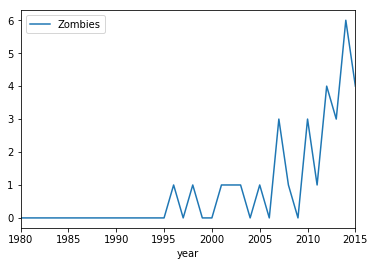

In [100]:
year_data.plot( y = 'Zombies')

In [101]:
year_data.columns

Index([u'Abstract Strategy', u'Action / Dexterity', u'Adventure',
       u'Age of Reason', u'American Civil War', u'American Indian Wars',
       u'American Revolutionary War', u'American West', u'Ancient', u'Animals',
       u'Arabian', u'Aviation / Flight', u'Bluffing', u'Book', u'Card Game',
       u'Children's Game', u'City Building', u'Civil War', u'Civilization',
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',
       u'Economic', u'Educational', u'Electronic', u'Environmental',
       u'Expansion for Base-game', u'Exploration', u'Fantasy', u'Farming',
       u'Fighting', u'Game System', u'Horror', u'Humor',
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',
       u'Music', u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',
       u'Novel-based', u'Number', u'Party Game', u'Pirat

In [126]:
df_total_plot = final_data_df.groupby('year').sum()
#df_total_plot = df_total_plot.drop([2016])
df_total_plot 

,year_total
year,
1980,7.0
1981,27.0
1982,16.0
1983,23.0
1984,8.0
1985,16.0
1986,34.0
1987,8.0
1988,18.0


In [127]:
year_data=year_data.reset_index()

In [128]:
df_total_plot=df_total_plot.reset_index()

In [129]:
all_data_for_plot = pd.merge(year_data, df_total_plot, on='year')

In [130]:
all_data_for_plot.columns

Index([u'year', u'Abstract Strategy', u'Action / Dexterity', u'Adventure',
       u'Age of Reason', u'American Civil War', u'American Indian Wars',
       u'American Revolutionary War', u'American West', u'Ancient', u'Animals',
       u'Arabian', u'Aviation / Flight', u'Bluffing', u'Book', u'Card Game',
       u'Children's Game', u'City Building', u'Civil War', u'Civilization',
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',
       u'Economic', u'Educational', u'Electronic', u'Environmental',
       u'Expansion for Base-game', u'Exploration', u'Fantasy', u'Farming',
       u'Fighting', u'Game System', u'Horror', u'Humor',
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',
       u'Music', u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',
       u'Novel-based', u'Number', u'Party Game'

In [146]:
data_plot = all_data_for_plot.drop([ 'Abstract Strategy','American Revolutionary War',  'Action / Dexterity','American Indian Wars',  'Age of Reason', 'American Civil War', u'Ancient', u'Animals',\
       u'Arabian', u'Aviation / Flight', u'Book', \
       u"Children's Game", u'Civil War', u'Civilization',\
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',\
       u'Economic', u'Educational', u'Electronic', u'Environmental',\
       u'Farming',\
        u'Game System', \
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',\
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',\
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',\
       u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',\
       u'Novel-based', u'Number', u'Party Game', u'Pirates', u'Political',\
       u'Post-Napoleonic', u'Prehistoric', u'Print & Play', u'Puzzle',\
       u'Racing', u'Real-time', u'Religious', u'Renaissance',\
       u'Spies/Secret Agents','Bluffing','Humor',u'Music',\
       u'Sports', u'Territory Building', u'Trains', u'Transportation',\
       u'Travel', u'Trivia', u'Video Game Theme', u'Vietnam War', u'Wargame',\
        u'World War I', u"World War II",'Word Game','American West','Fighting','City Building','Space Exploration'],axis = 1)

In [147]:
data_plot = data_plot.set_index('year')
data_plot = data_plot.drop(2015)
data_plot

,Adventure,Card Game,Expansion for Base-game,Exploration,Fantasy,Horror,Science Fiction,Zombies,year_total
year,,,,,,,,,
1980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
1981,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,27.0
1982,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1983,1.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,23.0
1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1985,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0
1986,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,34.0
1987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1988,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,18.0


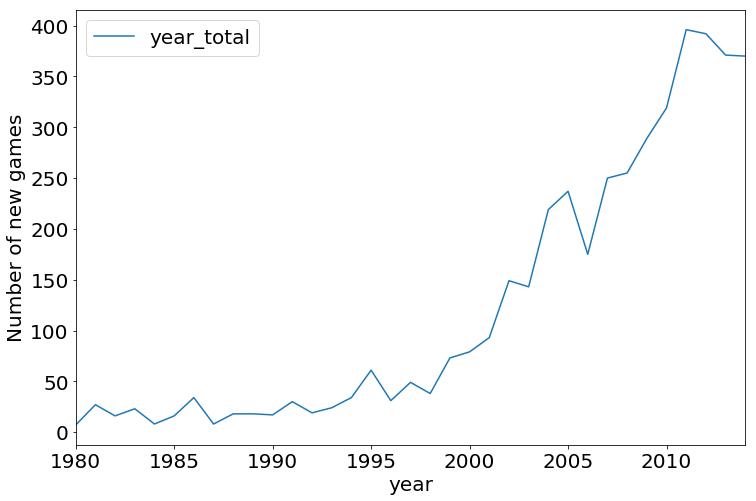

In [149]:

data_plot.plot(y = 'year_total', figsize=(12,8), fontsize = 20)
plt.legend(
   loc='best',
   ncol=1,
   fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of new games', fontsize=20)

In [150]:
data_plot= data_plot.drop('year_total', axis=1)

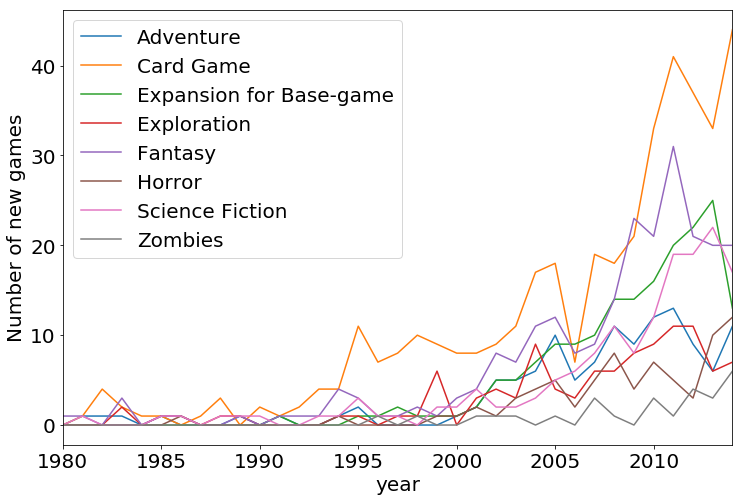

In [151]:
data_plot.plot(figsize=(12,8), fontsize = 20)
plt.legend(
   loc='best',
   ncol=1,
   fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of new games', fontsize=20)

In [158]:
data_plot.head(2)

,Adventure,Card Game,Expansion for Base-game,Exploration,Fantasy,Horror,Science Fiction,Zombies
year,,,,,,,,
1980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1981,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [173]:
#result.head()
result.name[(result.category == 'Zombies') & (result.year_released == 2015)]
#(a['x']==1) & (a['y']==10)

1520    [Zombicide: Black Plague, Epic Card Game, Zomb...
Name: name, dtype: object

I would love to make a super cool interactive plotly graphic here! Here is my first try.  I need to figure out how to get the hover text to show the games released each year in each genre. 

In [167]:
import plotly.plotly as py
import plotly.graph_objs as go

category1 = 'Zombies'
category2 = 'Fantasy'

trace1 = go.Scatter(
    x=data_plot.index,
    y=data_plot[category1]
)
trace2 = go.Scatter(
    x=data_plot.index,
    y=data_plot[category2]
)
data = [trace1, trace2]
layout = go.Layout(
    showlegend=False,
    annotations=[
        dict(
            x=2,
            y=5,
            xref='x',
            yref='y',
            text='dict Text',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='simple-annotation')

In [196]:
import plotly.plotly as py
import plotly.graph_objs as go

category1 = 'Zombies'
category2 = 'Fantasy'

Zombies = go.Scatter(
    x=data_plot.index,
    y=data_plot[category1],
    text = 'x',
    name = "Zombies", #[result.name[(result.category == category1) & (result.year_released == 2015)]],
    hoverinfo = "x+y+name+text"
)
Fantasy = go.Scatter(
    x=data_plot.index,
    y=data_plot[category2],
    text = x, #[result.name[(result.category == category2) & (result.year_released == 2015)]],
    name = "Fantasy",
    hoverinfo = "x+y+name+text"
)
data = [Zombies, Fantasy]
layout = go.Layout(
    showlegend=False,
    annotations=[
        dict(
            x=2,
            y=5,
            xref='x',
            yref='y',
            text='dict Text',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='simple-annotation')

NameError: name 'x' is not defined

In [182]:
data_plot.to_csv('test.csv')

In [183]:
final_data_df.to_csv('test2.csv')

In [136]:
df_attributes = df_games_attributes.set_index([u'name', u'year_released'])['attributes'].apply(pd.Series).stack()
df_attributes = df_attributes.reset_index()
df_attributes.columns = ['name','year_released','attributes_num','attributes']
df_attributes

,name,year_released,attributes_num,attributes
0,Catan,1995,0,Dice Rolling
1,Catan,1995,1,Hand Management
2,Catan,1995,2,Modular Board
3,Catan,1995,3,Route/Network Building
4,Catan,1995,4,Trading
5,Carcassonne,2000,0,Area Control / Area Influence
6,Carcassonne,2000,1,Tile Placement
7,Pandemic,2008,0,Action Point Allowance System
8,Pandemic,2008,1,Co-operative Play
9,Pandemic,2008,2,Hand Management


In [137]:
df_attributes = df_attributes[df_attributes['year_released']>1980]

In [138]:
df_attributes.groupby(['attributes','year_released']).count()

name  attributes_num
attributes                    year_released                      
Acting                        1998              1               1
                              1999              1               1
                              2004              1               1
                              2005              2               2
                              2008              1               1
                              2009              1               1
                              2010              1               1
                              2012              1               1
                              2013              1               1
                              2016              1               1
Action / Movement Programming 1982              1               1
                              1994              1               1
                              2000              1               1
                              2002              3               3
                              2004              2               2
                              2005              2               2
                              2006              1               1
                              2007              1               1
                              2008              1               1
                              2009              3               3
                              2010              3               3
                              2012              9               9
                              2013              8               8
                              2014              3               3
                              2015              4               4
                              2016              2               2
                              2017              1               1
Action Point Allowance System 1982              1               1
                              1983              1               1
                              1989              2               2
...                                           ...             ...
Voting                        2001              1               1
                              2004              2               2
                              2005              2               2
                              2006              3               3
                              2007              2               2
                              2008              3               3
                              2009              2               2
                              2010              3               3
                              2011              5               5
                              2012              4               4
                              2013              4               4
                              2014              3               3
                              2015              4               4
                              2016              3               3
Worker Placement              2000              1               1
                              2002              1               1
                              2004              1               1
                              2005              2               2
                              2006              2               2
                              2007              7               7
                              2008              7               7
                              2009             10              10
                              2010              8               8
                              2011             16              16
                              2012             16              16
                              2013             19              19
                              2014             12              12
                              2015             17              17
                   